## What do the distributions of player grades look like?

In [1]:
import eredivisie_nlp as enlp
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from scipy import stats

In [2]:
ROOT = os.path.dirname(os.path.dirname(os.getcwd()))

In [3]:
grades_df = pd.read_csv(enlp.determine_root() + "/data/grades.csv", index_col=[0])

In [4]:
min_vi = min(grades_df.VI)
print(f"Minimum grade given by VI: {min_vi}")
min_ad = min(grades_df.AD)
print(f"Minimum grade given by AD: {min_ad}")
min_fm = min(grades_df.FM)
print(f"Minimum grade given by FM: {min_fm}")

Minimum grade given by VI: 3.5
Minimum grade given by AD: 3.0
Minimum grade given by FM: 2.1


In [5]:
max_vi = max(grades_df.VI)
print(f"Maximum grade given by VI: {max_vi}")
max_ad = max(grades_df.AD)
print(f"Maximum grade given by AD: {max_ad}")
max_fm = max(grades_df.FM)
print(f"Maximum grade given by FM: {max_fm}")

Maximum grade given by VI: 8.5
Maximum grade given by AD: 8.5
Maximum grade given by FM: 9.9


(array([1.000e+00, 1.020e+02, 1.190e+02, 7.670e+02, 6.690e+02, 1.302e+03,
        8.300e+02, 4.120e+02, 1.060e+02, 5.600e+01]),
 array([3.  , 3.55, 4.1 , 4.65, 5.2 , 5.75, 6.3 , 6.85, 7.4 , 7.95, 8.5 ]),
 <BarContainer object of 10 artists>)

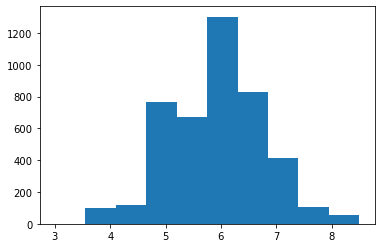

In [6]:
plt.hist(grades_df.AD)

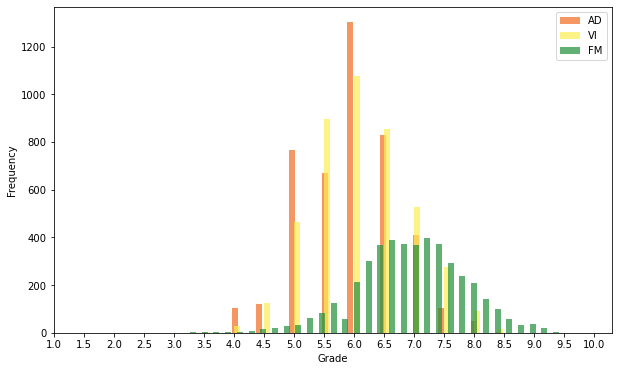

In [7]:
def plot_grades_density(save = False):
    plt.figure(figsize = [10, 6])
    grades_df.AD.plot.hist(bins=40, width=.1, fc=(0.95, 0.42, 0.13, 0.7))
    grades_df.VI.plot.hist(bins=40, width=.1, fc=(0.99, 0.93, 0.32, 0.7))
    grades_df.FM.plot.hist(bins=40, width=.1, fc=(0.13, 0.56, 0.23, 0.7))
    plt.legend()
    plt.xlabel('Grade')
    plt.xticks([n for n in np.arange(1, 10.5, 0.5)])
    if save:
        plt.savefig(enlp.determine_root() + "/res/figures/grades_density.png")
    plt.show()

plot_grades_density(save=True)

Plots seem to be normally distributed, lets check to make sure

In [8]:
print(f"P value for normality VI: {stats.normaltest(grades_df.VI, nan_policy='omit').pvalue}")
print(f"P value for normality AD: {stats.normaltest(grades_df.AD, nan_policy='omit').pvalue}")
print(f"P value for normality FM: {stats.normaltest(grades_df.FM, nan_policy='omit').pvalue}")

P value for normality VI: 2.102360567375891e-06
P value for normality AD: 0.7875041508450682
P value for normality FM: 4.405710852434027e-18


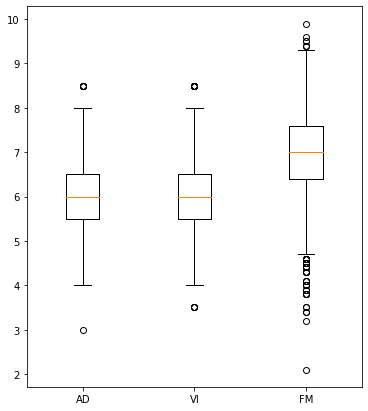

In [9]:
plt.figure(figsize=[6, 7])
plt.boxplot([grades_df.AD[~np.isnan(grades_df.AD)], grades_df.VI[~np.isnan(grades_df.VI)], grades_df.FM[~np.isnan(grades_df.FM)]])
plt.xticks([1, 2, 3], ['AD', 'VI', 'FM'])
plt.show()

In [10]:
grades_df

,datetime,player,AD,VI,home,away,time,date,id,FM,...,Own goal,Conceded penalty,Error led to goal,Penalties won,Errors led to goal,Crosses,Penalties miss,hashtag,squad_abbr,player_id
0,2021-12-12 15:45:00+00:00,edson alvarez,5.0,5.0,AFC Ajax,AZ Alkmaar,16:45,2021-12-12,edson alvarez#ajaaz,6.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#ajaaz,aja,alvarez_aja
1,2021-12-12 15:45:00+00:00,antony,5.5,6.5,AFC Ajax,AZ Alkmaar,16:45,2021-12-12,antony#ajaaz,7.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#ajaaz,aja,antony_aja
2,2021-12-12 15:45:00+00:00,steven berghuis,5.5,5.5,AFC Ajax,AZ Alkmaar,16:45,2021-12-12,steven berghuis#ajaaz,7.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#ajaaz,aja,berghuis_aja
3,2021-12-12 15:45:00+00:00,daley blind,5.0,5.0,AFC Ajax,AZ Alkmaar,16:45,2021-12-12,daley blind#ajaaz,7.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#ajaaz,aja,blind_aja
4,2021-12-12 15:45:00+00:00,ryan gravenberch,5.0,6.0,AFC Ajax,AZ Alkmaar,16:45,2021-12-12,ryan gravenberch#ajaaz,6.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#ajaaz,aja,gravenberch_aja
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4770,2021-11-06 19:00:00+00:00,giannis masouras,6.5,7.0,Willem II,Sparta Rotterdam,20:00,2021-11-06,giannis masouras#wilspa,8.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#wilspa,spa,masouras_spa
4772,2021-11-06 19:00:00+00:00,sven mijnans,6.5,6.0,Willem II,Sparta Rotterdam,20:00,2021-11-06,sven mijnans#wilspa,7.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#wilspa,spa,mijnans_spa
4773,2021-11-06 19:00:00+00:00,maduka okoye,6.0,6.5,Willem II,Sparta Rotterdam,20:00,2021-11-06,maduka okoye#wilspa,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#wilspa,spa,okoye_spa
4775,2021-11-06 19:00:00+00:00,lennart thy,5.0,6.5,Willem II,Sparta Rotterdam,20:00,2021-11-06,lennart thy#wilspa,6.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#wilspa,spa,thy_spa


# Determining the relative average scores

In [17]:
grades_df.shape[0]

4364